# ***Determining Hotel Reservation Cancellation Inferences Using Descriptive Analysis****

---
## **Dataset Description**

This data collection comprises reservation details for a city hotel and a resort hotel, such as the date the reservation was made, the duration of the stay, the number of people, kids, and/or babies, and the number of parking spaces available, among other details.

## **Goal**

The primary objective of this study is to discover the inferences on booking cancellation in Hotel side using descriptive analysis.

## **Objectives**
1. To analyze and conduct preprocessing
2. To explore and understand the data by EDA to response for the below questions:
   * Where are the visitors from?
   * How many reservations were cancelled?
   * Which month is the busiest?
   * In which/what month are the most cancellations made?
   * which hotel type experiences the most cancellations?
   * The total number of bookings for both the hotels combined
   * The total length of stay
   * Insights on total bookings across(Any distinctions between market segments?) 
     * market_segment
     * distribution_channel
     * deposit_type
     * customer_type 
     * reservation_status
   * ADR Per Person 
   * ADR across meal
   * Cancelation across 
     * Country
     * Customer Type
  * Booking Trends accross Month
     
---




# **Dataset Loading and Preprocessing**

---



## *Import Libraries*
---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import datetime
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

In [ ]:
from plotly import express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import RFE 
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix


## *Read the Hotel Booking Dataset*

---



In [ ]:
## Import Data
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hotel_bookings.csv')

## Display Data
raw_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## *Data Preprocessing(process the dataset to replace/remove missing values, duplicate values)*

---

Best practice is to take a copy of the original dataset before preprocessing

In [ ]:
## Copy the dataset
data_c = raw_data.copy()

*Size of dataset*

---



In [ ]:
 # Number of rows and the columns in the dataset
print(" SIZE OF THE DATA ")
rows = data_c.shape[0]
columns = data_c.shape[1]
print()
print("TOTAL NUMBER OF ROWS    :{}".format(rows))
print("TOTAL NUMBER OF COLUMNS :{}".format(columns))
print()

 SIZE OF THE DATA 

TOTAL NUMBER OF ROWS    :119390
TOTAL NUMBER OF COLUMNS :32



*Data Description*

---



In [ ]:
# Dataset description/summary
print(" DESCRIPTIVE ANALYSIS ")
print(data_c.describe())
print()

 DESCRIPTIVE ANALYSIS 
         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                 

*Remove Duplicate data*

---



In [ ]:
#Check if data holds duplicate values.
data_c.duplicated().any()

True

Though the dataset contains duplicate data, there is a high chance of having multiple bookings with the same features. Therfore, we are not going to drop the duplicate values

---



*Missing Values*

---



In [ ]:
# Identify null values 
print("FEATURES WITH NULL VALUES ")
print()
data_c.isnull().sum().sort_values(ascending=False)[:6]

FEATURES WITH NULL VALUES 



company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
assigned_room_type         0
dtype: int64

Before imputing missing values, let us explore missing data

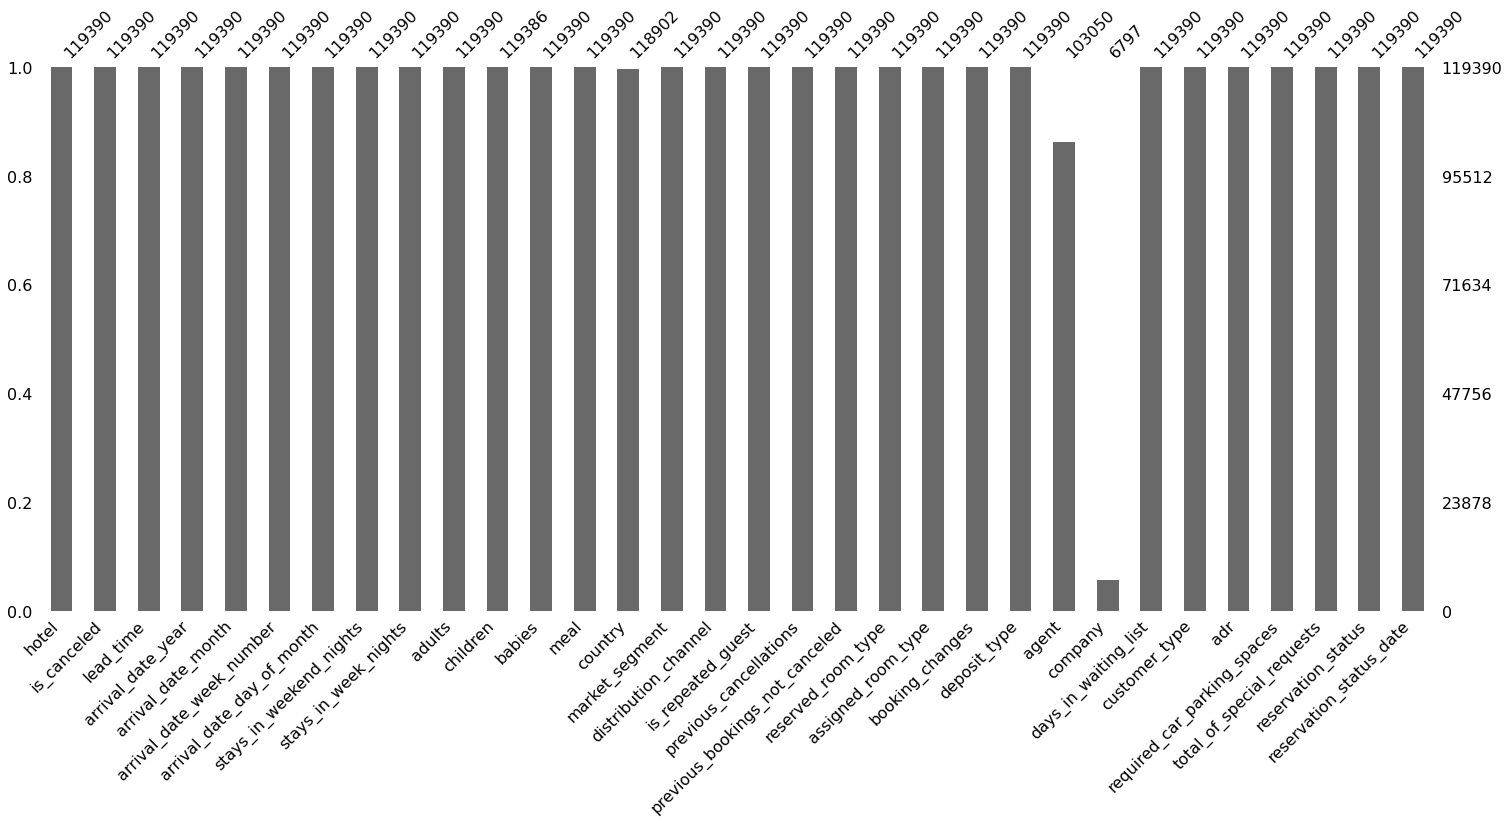

In [ ]:
import missingno as msno
msno.bar(data_c)
plt.show()

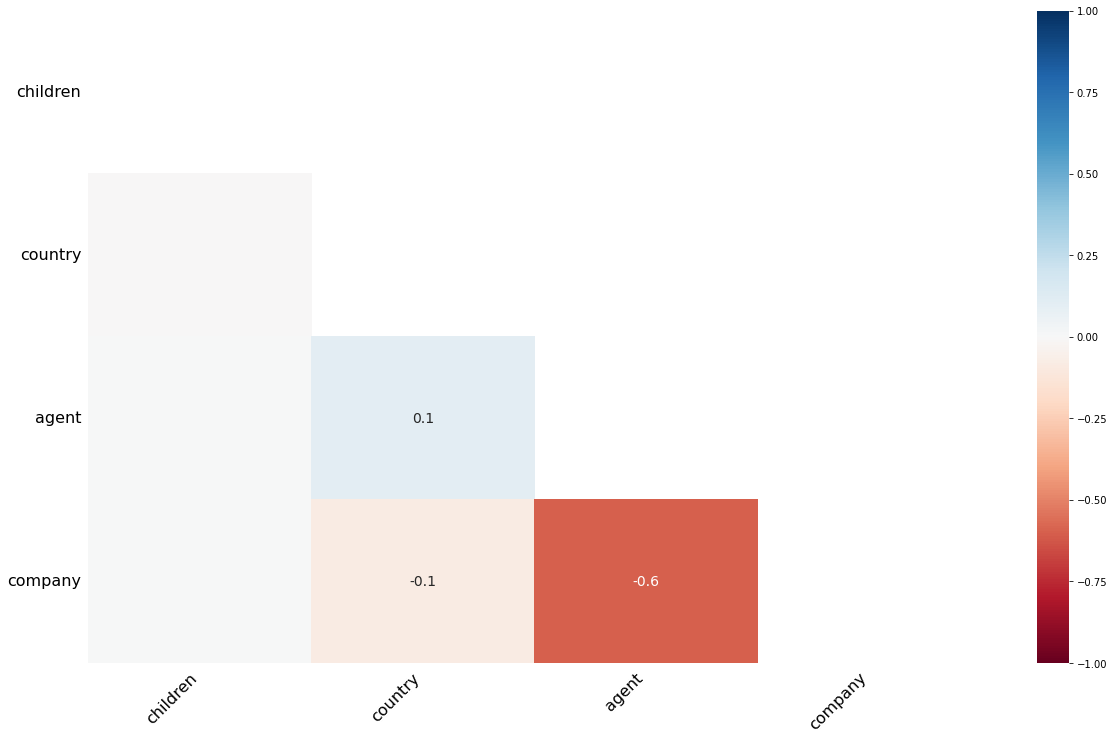

In [ ]:
msno.heatmap(data_c)

Agent and Company contains 1% relationship. So, we can impute missing values easily

***Handling the Missing Values***

---



In [ ]:
# Create new categories for both the agent and the company colum
data_c['agent'] = pd.to_numeric(data_c['agent'], errors='coerce')
data_c['agent'] = data_c['agent'].fillna(0).astype(int)

data_c['company'] = pd.to_numeric(data_c['company'], errors='coerce')
data_c['company'] = data_c['company'].fillna(0).astype(int)

# Changing children value of NULL to "0" and converting to integer type: 
data_c['children'] = data_c['children'].fillna(0).astype(int)
# Replacing null value for country feature with "unknown"
data_c['country'] = data_c['country'].fillna('Unknown')


In [ ]:
# Checking that no missing values remain:
data_c.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

*Check Column Datatypes*

---



In [ ]:
# Checking our features' data types:
data_c.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
# Changing reservation status date to datetime type due to discripency: 
data_c['reservation_status_date'] = pd.to_datetime(data_c['reservation_status_date'])

In [ ]:
data_c.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

## *Feature Engineering*

---


The dataset contains customer's arrival date with day, month, and year each in a separate feature. For our analysis purposes, we are going to combined all into one "arrival_data" feature
Additionally, to calculate the total stay duration/total number of days stayed, create a new column from ['arrival_data' - 'reservation_status_date']


---




In [ ]:
# Creating the arrival_data feature: 
data_c['arrival_data'] = data_c['arrival_date_year'].astype(str) + "-" + data_c['arrival_date_month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}).astype(str) + "-" + data_c['arrival_date_day_of_month'].astype(str)
data_c['arrival_data'] = pd.to_datetime(data_c['arrival_data'], format="%Y-%m-%d")

# Creating a new feature representing length of stay or how many days before arrival did the customer cancel:
data_c['status_minus_arrival_date'] = np.abs(data_c['arrival_data'] - data_c['reservation_status_date']).astype(str)
# formating the feature 
def format_lenght(date):
    return date[0]
data_c['status_minus_arrival_date'] = data_c['status_minus_arrival_date'].map(format_lenght).astype(int)

#Create a new feature 'total_guests" by  merging adults,children and babies features
data_c["total_guests"] = data_c["adults"] + data_c["children"] + data_c["babies"]

#Convert month into labels
data_c['arrival_date_month'] = data_c['arrival_date_month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}).astype(str)

#Create new feature to store length of night stay
data_c['total_nights'] = data_c['stays_in_weekend_nights']+ data_c['stays_in_week_nights']

data_c['arrival_date'] = data_c['arrival_date_day_of_month'].astype('str') + '/' + data_c['arrival_date_month_number']

In [ ]:
data_c.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_data,status_minus_arrival_date,total_guests,total_nights
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1,1
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1,1
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2,2


# **Visualization | Exploratory Data Analysis**

---

### ***Import plot libraries***

In [ ]:
!pip install chart_studio

In [ ]:
import cufflinks as cf
import plotly
import chart_studio.plotly 
import plotly.tools 
import plotly.graph_objs as go
from chart_studio.plotly import plot, iplot

### ***Hotel booking based on the Hotel types namely Resort and City Hotel***

---



In [ ]:
#Palette
colours = ["green", "gold", "blue", "Red", "orange", "purple"]

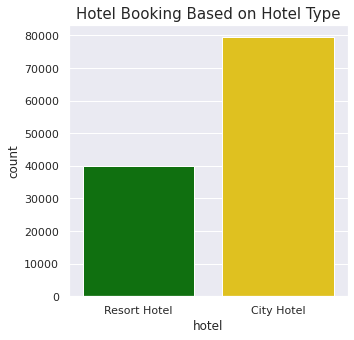

In [ ]:
# Plot the countplot for both the hotel types
sns.set(style = "darkgrid")
plt.figure(figsize=(5,5))
plt.title('Hotel Booking Based on Hotel Type', fontdict = {'fontsize': 15})
colours = ["green", "gold"]
sns.countplot(data=data_c, x = 'hotel', palette=colours)
plt.show()

Observation : From the above statistics, it is clear that more than 60% of the customers booked the City hotel

---



## *Customers from Top 15 countries*

---




In [ ]:
#Total Countries
data_c.country.nunique()

178

In [ ]:
#Select top 15 countries
top_countries = data_c.country.value_counts().head(15)
top_countries

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
Name: country, dtype: int64

In [ ]:
#Plotly to display count basedon trace
color_discrete_map = {'red', 'blue', 'green'}
plot1 = [go.Bar(x=top_countries.index, y=top_countries,  marker=dict(line=dict(color='red', width=0.5)) )]
layout = go.Layout(title='Top 15 countries based on guest booking',xaxis_title="Country",yaxis_title ="Count")
fig = go.Figure(data=plot1, layout=layout)
fig.show()

Observation :Based on booking data, the numbers above show the top 15 nations that guests preferred

---




## *Let us classify booking based on " Confirmed Booking and   " Canceled Booking"*



---



### ***1. How many guests canceled the booking? [Based on hotel type]***

In [ ]:
#Total count based on hotel type
print("Total Cancellation Vs Confirmed by Hotel Type")
cancel = data_c.groupby(['is_canceled','hotel'])['total_guests'].sum().reset_index().sort_values("is_canceled")
cancel

Total Cancellation Vs Confirmed by Hotel Type


,is_canceled,hotel,total_guests
0,0,City Hotel,89456
1,0,Resort Hotel,56551
2,1,City Hotel,65022
3,1,Resort Hotel,23959


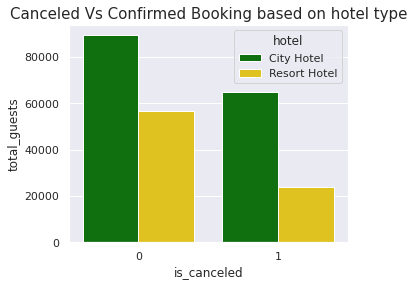

In [ ]:
# Plot the countplot to visualize total count based on hotel type
sns.set(style = "darkgrid")
plt.figure(figsize=(5,4))
plt.title('Canceled Vs Confirmed Booking based on hotel type', fontdict = {'fontsize': 15})
sns.barplot(data=cancel, x = 'is_canceled',y = 'total_guests', hue = 'hotel',palette=colours)
plt.show()

Observation: Based on above statistics, it is clear that comparitively both cancellation and confirmed booking is gigher in city hotel

### ***2. Total number of bookings***
 
---


Both the hotels

---



In [ ]:
not_canceled = data_c[data_c['is_canceled'] == 0]
not_cancel = not_canceled.groupby(['is_canceled' ,'hotel','arrival_date_year'])['total_guests'].sum().reset_index().sort_values("is_canceled")
not_cancel
not_cancel['percent'] = (not_cancel['total_guests']/not_cancel['total_guests'].sum())*100
not_cancel

,is_canceled,hotel,arrival_date_year,total_guests,percent
0,0,City Hotel,2015,13739,9.409823
1,0,City Hotel,2016,44433,30.432103
2,0,City Hotel,2017,31284,21.426370
3,0,Resort Hotel,2015,12205,8.359188
4,0,Resort Hotel,2016,26431,18.102557
5,0,Resort Hotel,2017,17915,12.269960


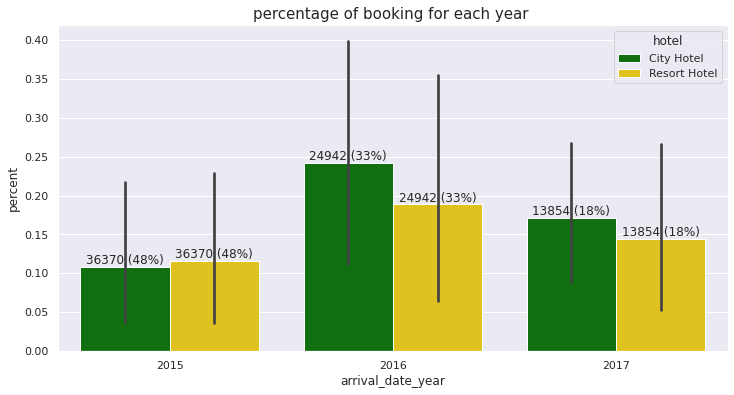

In [ ]:
# Plot the countplot to visualize percentage of booking for each year based on hotel type
sns.set(style = "darkgrid")
plt.figure(figsize=(12,6))
plt.title('percentage of booking for each year ', fontdict = {'fontsize': 15})
ax=sns.barplot(data=not_cancel, x = 'arrival_date_year',y = 'percent', hue = 'hotel',palette=colours)
abs_values = not_canceled['arrival_date_year'].value_counts(ascending=False)
rel_values = not_canceled['arrival_date_year'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
ax.bar_label(container=ax.containers[1], labels=lbls)
plt.show()

Observation: 2016 shows more than a double-digit increase in bookings over 2015. However, the next year's bookings dropped by roughly 15%.

---



In [ ]:
!pip install --upgrade matplotlib

***Across market_segment***

---



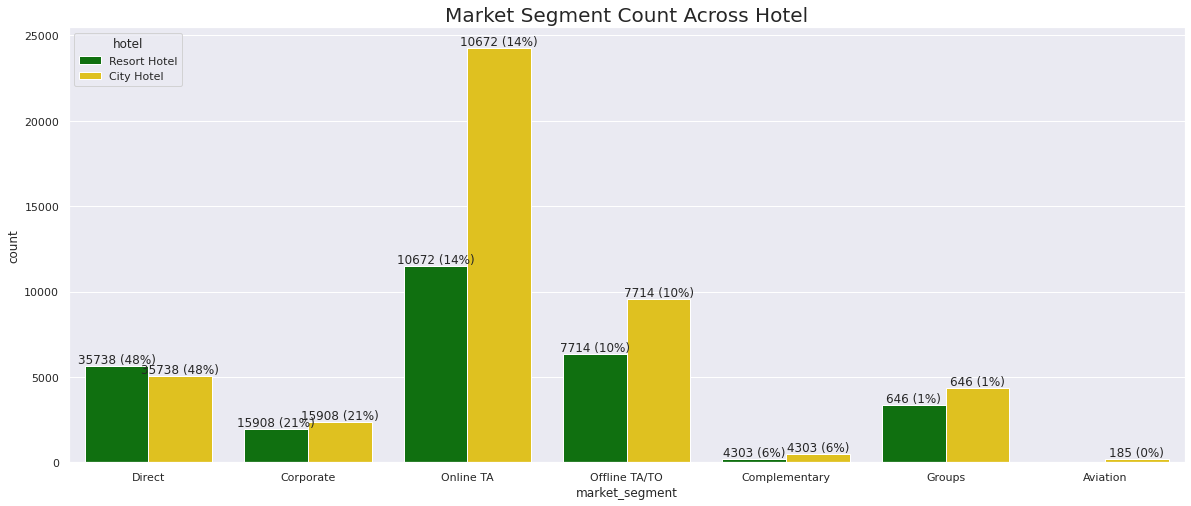

In [ ]:
# Marget segment across both the hotel types
plt.figure(figsize=(20, 8))
ax=sns.countplot(data=not_canceled, x = 'market_segment', hue='hotel',palette = colours)
plt.title('Market Segment Count Across Hotel', fontdict={'fontsize' : 20})
abs_values = not_canceled['market_segment'].value_counts(ascending=False)
rel_values = not_canceled['market_segment'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
ax.bar_label(container=ax.containers[1], labels=lbls)
plt.show()

Observation: Comparitively "Online TA" segment booking is higher than others

---



***Across Distribution channel***

---

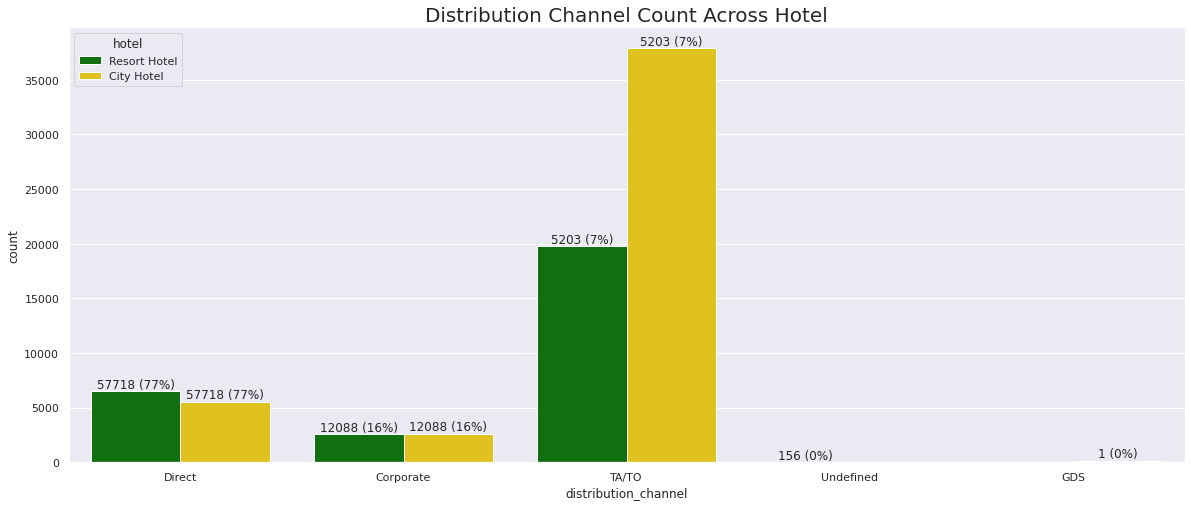

In [ ]:
# Distribution channel across hotel
plt.figure(figsize=(20, 8))
ax=sns.countplot(data=not_canceled, x = 'distribution_channel', hue='hotel',palette = colours)
plt.title('Distribution Channel Count Across Hotel', fontdict={'fontsize' : 20})
abs_values = not_canceled['distribution_channel'].value_counts(ascending=False)
rel_values = not_canceled['distribution_channel'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
ax.bar_label(container=ax.containers[1], labels=lbls)
plt.show()

Observation: Comparitively "Online TA" segment booking is higher than others

---



***Deposit Type***

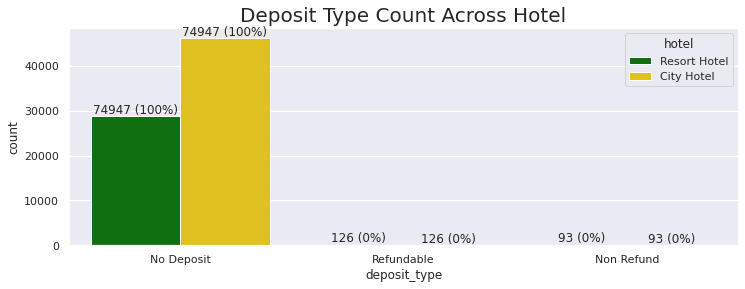

In [ ]:
# Deposit_type across hotel 
plt.figure(figsize=(12, 4))
ax=sns.countplot(data=not_canceled, x = 'deposit_type', hue='hotel', palette = colours)
plt.title('Deposit Type Count Across Hotel', fontdict={'fontsize' : 20})
abs_values = not_canceled['deposit_type'].value_counts(ascending=False)
rel_values = not_canceled['deposit_type'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
ax.bar_label(container=ax.containers[1], labels=lbls)
plt.show()


Observation : According to the aforementioned statistics, bookings for the "No Deposit" category are higher than those for the other two deposit types.

---



***Customer Type***

---

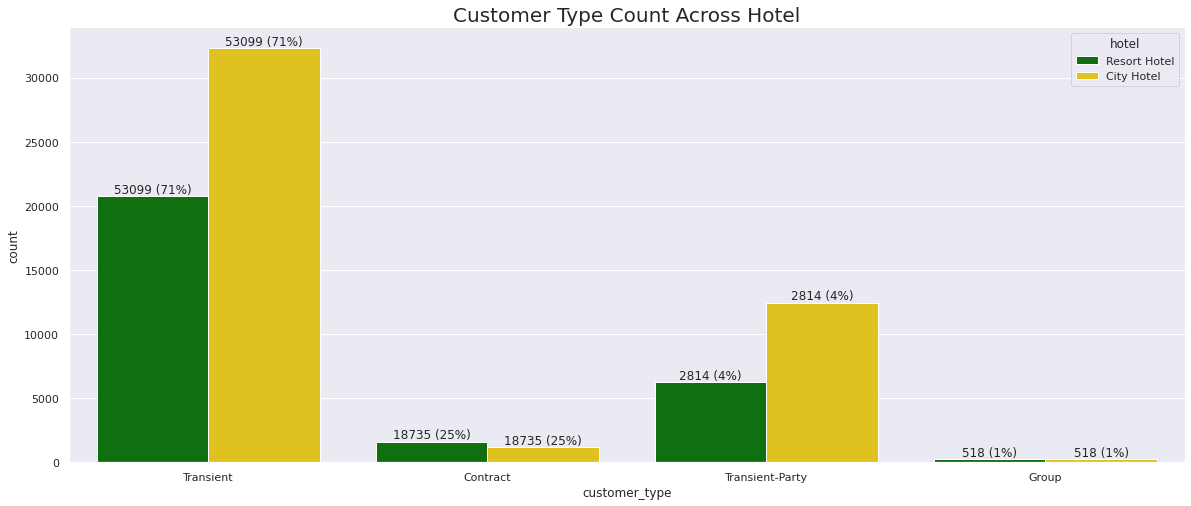

In [ ]:
#Cutomer type across hotel 
plt.figure(figsize=(20, 8))
ax=sns.countplot(data=not_canceled, x = 'customer_type', hue='hotel', palette = colours)
plt.title('Customer Type Count Across Hotel', fontdict={'fontsize' : 20})
abs_values = not_canceled['customer_type'].value_counts(ascending=False)
rel_values = not_canceled['customer_type'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
ax.bar_label(container=ax.containers[1], labels=lbls)
plt.show()

Observation : Transient and Transient-Party type of customers were showing interest in booking both type of hotels

***Reservation Status***

---


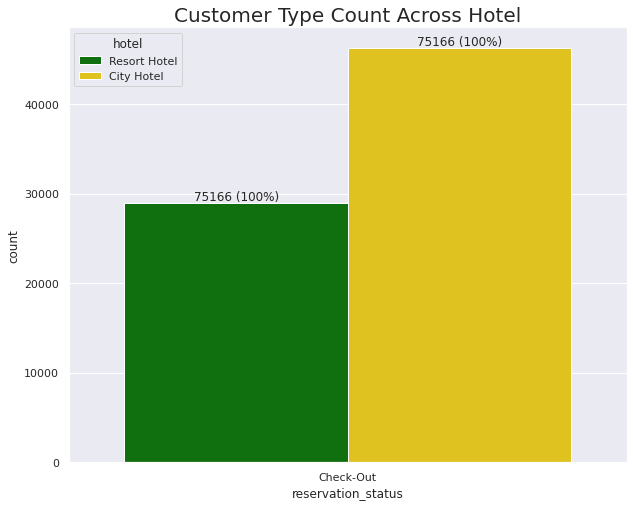

In [ ]:
#Reservation status across hotel 
plt.figure(figsize=(10, 8))
ax=sns.countplot(data=not_canceled, x = 'reservation_status', hue='hotel', palette = colours)
plt.title('Customer Type Count Across Hotel', fontdict={'fontsize' : 20})
abs_values = not_canceled['reservation_status'].value_counts(ascending=False)
rel_values = not_canceled['reservation_status'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
ax.bar_label(container=ax.containers[1], labels=lbls)
plt.show()

**Observation : 
Overall: Insights on total bookings across market_segment,distribution_channel, deposit_type, customer_type and reservation_status shows that reservations for city hotels are consistently higher than reservations for resorts** 

---



### ***3. Best time to book the hotel***

---

Identify booking based on Month
What is the percentage of booking for each year?

In [72]:
resort = not_canceled.loc[(not_canceled["hotel"] == "Resort Hotel") & (not_canceled["is_canceled"] == 0)]
city =  not_canceled.loc[(not_canceled["hotel"] == "City Hotel") & (not_canceled["is_canceled"] == 0)]

In [59]:
# Extract the monthly adr data
adr_monthly = not_canceled[["hotel", "arrival_date_month", "adr","total_guests"]].sort_values("arrival_date_month")

# Order the data by months
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
adr_monthly["arrival_date_month"] = pd.Categorical(adr_monthly["arrival_date_month"], categories=ordered_months, ordered=True)

# Extract the monthly country data
country_monthly = not_canceled[["hotel", "arrival_date_month", "country","total_guests"]].sort_values("arrival_date_month")

# Order the data by months
country_monthly["arrival_date_month"] = pd.Categorical(country_monthly["arrival_date_month"], categories=ordered_months, ordered=True)

cust_by_month = not_canceled.groupby(['arrival_date_month','hotel'])['total_guests'].sum().reset_index().sort_values("arrival_date_month")

# Order the data by months
cust_by_month["arrival_date_month"] = pd.Categorical(cust_by_month["arrival_date_month"], categories=ordered_months, ordered=True)

In [87]:
#Calculate booking based on Month 
monthly_count = not_canceled.groupby(['hotel','arrival_date_month'])['total_guests'].sum().reset_index().sort_values("hotel")
monthly_count

,hotel,arrival_date_month,total_guests
0,City Hotel,1,4002
10,City Hotel,8,11620
9,City Hotel,7,10266
8,City Hotel,6,8396
7,City Hotel,5,8579
6,City Hotel,4,8146
11,City Hotel,9,7895
4,City Hotel,2,5723
3,City Hotel,12,4707
2,City Hotel,11,4561


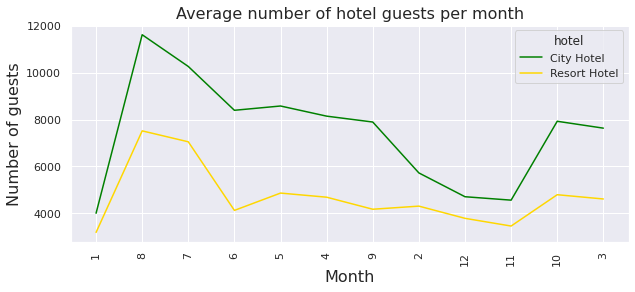

In [93]:
#show figure:
colors = ('green', 'gold')
plt.figure(figsize=(10, 4))
sns.lineplot(x = "arrival_date_month", y="total_guests", hue="hotel", data=monthly_count, palette = colors)
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=90)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

Observation : During the month of september and october, when rates are highest, witness an upsurge in visitors to the City Hotel. In July and August, when the costs are still lower, fewer visitors arrive.

Fewer visitors stay at the Resort hotel from June through September, when costs are at their highest. November, December January months are the least popular for guests at both hotels.

---



In [94]:
not_canceled_stay = not_canceled.groupby(['total_nights','hotel']).sum().reset_index().sort_values("hotel")
not_canceled_stay1 = not_canceled_stay[['total_nights','hotel']].sort_values("total_nights")
not_canceled_stay1

,total_nights,hotel
0,0,City Hotel
1,0,Resort Hotel
3,1,Resort Hotel
2,1,City Hotel
4,2,City Hotel
...,...,...
63,49,City Hotel
64,56,Resort Hotel
65,57,City Hotel
66,60,Resort Hotel


## ***4. Cost of a room per night***

---
ADR +Month+Hotel = Find the hightest price and month 

**2.How much do guests pay for a room per night?**

2.1 Month vs ADR

2.2 Month vs Customers

2.3 Month vs Country


### `PLOT THE VARIATION OF ADR ACROSS MONTHS`

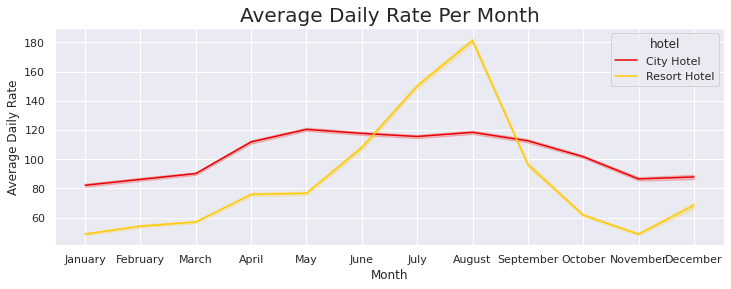

In [ ]:
# Plot ADR versus Months
plt.figure(figsize=(12,4))
sns.lineplot(data=adr_monthly , x='arrival_date_month', y='adr', hue='hotel', palette='hot')
plt.title('Average Daily Rate Per Month', fontdict={'fontsize' : 20})
plt.xlabel('Month')
plt.ylabel('Average Daily Rate')
plt.show()

### `PLOT THE VARIATION OF ADR ACROSS MONTHS`

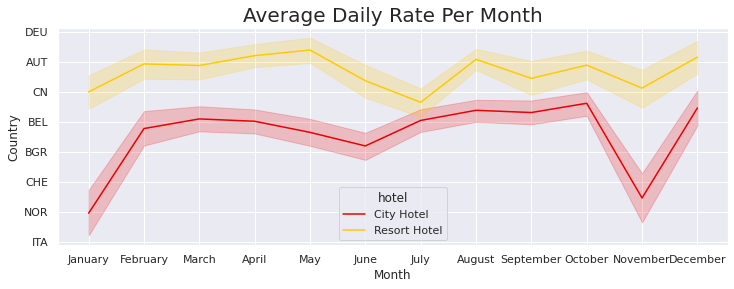

In [ ]:
# Plot ADR versus Months
plt.figure(figsize=(12,4))
sns.lineplot(data=country_monthly , x='arrival_date_month', y='country', hue='hotel', palette='hot')
plt.title('Average Daily Rate Per Month', fontdict={'fontsize' : 20})
plt.xlabel('Month')
plt.ylabel('Country')
plt.show()

### `PLOT THE VARIATION OF ADR ACROSS MONTHS`

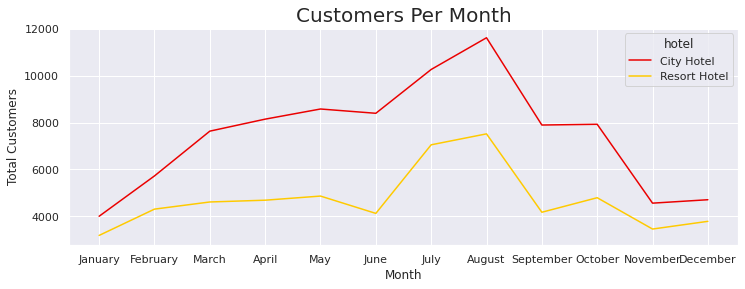

In [ ]:
# Plot ADR versus Months
plt.figure(figsize=(12,4))
sns.lineplot(data=cust_by_month , x='arrival_date_month', y='total_guests', hue = 'hotel', palette='hot')
plt.title('Customers Per Month', fontdict={'fontsize' : 20})
plt.xlabel('Month')
plt.ylabel('Total Customers')
plt.show()

The City Hotel sees an increase in visitors in the spring and fall when rates are also the greatest. Less people arrive in July and August, when the prices are still lower.

From June through September, when costs are at their greatest, fewer guests stay at the Resort hotel. The winter season draws the fewest visitors to both hotels

### ***Cost paid per Night***

---



In [ ]:
adr_monthly['adr_pp'] = adr_monthly['adr']/(adr_monthly['total_guests'])
adr_monthly

,hotel,arrival_date_month,adr,total_guests,adr_pp
48869,City Hotel,April,81.9,1,81.90
110757,City Hotel,April,130.5,2,65.25
110758,City Hotel,April,130.5,2,65.25
110759,City Hotel,April,135.0,3,45.00
110760,City Hotel,April,130.5,2,65.25
...,...,...,...,...,...
43519,City Hotel,September,62.0,2,31.00
43518,City Hotel,September,84.0,3,28.00
43517,City Hotel,September,76.5,2,38.25
43563,City Hotel,September,90.0,2,45.00


In [102]:
city_filtered = city.replace([np.inf, -np.inf], 0)
resort_filtered = city.replace([np.inf, -np.inf], 0)

### ***4. How Long People Stay in the hotel?***

---



In [ ]:
not_canceled['total_nights'] = not_canceled['stays_in_weekend_nights']+ not_canceled['stays_in_week_nights']
not_canceled['adr_pp'] = not_canceled['adr']/(not_canceled['total_guests'])
not_canceled.head()
#not_canceled_stay_len = not_canceled.groupby(["hotel", "arrival_date_month", "adr_pp","total_guests","total_nights"]).sum().reset_index().sort_values("arrival_date_month")
#not_canceled_stay_len = not_canceled_stay_len[["hotel", "arrival_date_month", "adr_pp","total_guests","total_nights"]].sort_values("arrival_date_month")
#not_canceled_stay_len

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_data,status_minus_arrival_date,total_guests,total_nights,adr_pp
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,No Agent,No Company,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,No Agent,No Company,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,No Agent,No Company,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1,1,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,No Company,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1,1,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,No Company,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2,2,49.0


In [ ]:
#Total night stay based on hotel type
not_canceled_stay = not_canceled.groupby(['total_nights','hotel']).sum().reset_index().sort_values("hotel")
not_canceled_stay1 = not_canceled_stay[['total_nights','hotel']].sort_values("total_nights")
not_canceled_stay1

,total_nights,hotel
0,0,City Hotel
1,0,Resort Hotel
3,1,Resort Hotel
2,1,City Hotel
4,2,City Hotel
...,...,...
63,49,City Hotel
64,56,Resort Hotel
65,57,City Hotel
66,60,Resort Hotel


In [ ]:
data_hotel_stay_month = not_canceled.groupby(['arrival_date_month','hotel'])['total_nights'].sum().reset_index().sort_values("arrival_date_month")
data_hotel_stay_month

,arrival_date_month,hotel,total_nights
0,April,City Hotel,12154
1,April,Resort Hotel,9641
2,August,City Hotel,16943
3,August,Resort Hotel,16846
4,December,City Hotel,7099
5,December,Resort Hotel,6225
6,February,City Hotel,8793
7,February,Resort Hotel,6995
8,January,City Hotel,6294
9,January,Resort Hotel,5038


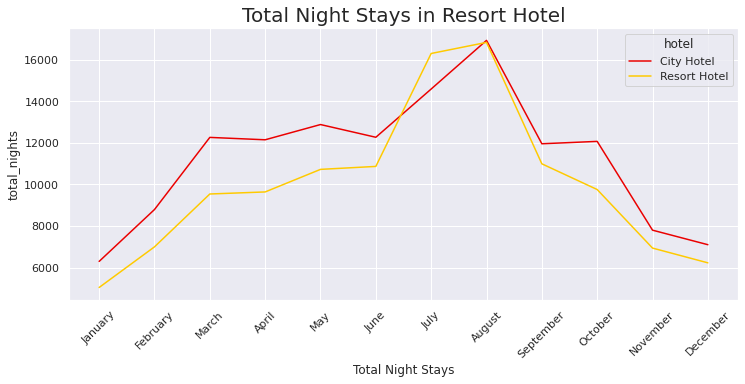

In [ ]:
data_hotel_stay_month["arrival_date_month"] = pd.Categorical(data_hotel_stay_month["arrival_date_month"], categories=ordered_months, ordered=True)
fig = plt.subplots(1, 1, figsize = (12, 5))
# Distribution of total night stays across Resort Hotel
#sns.boxplot(data=data_resort_stay_month, x='arrival_date_month', y='total_nights', hue='hotel')
sns.lineplot(data=data_hotel_stay_month , x='arrival_date_month', y='total_nights', hue='hotel', palette='hot')
plt.xlabel('Total Night Stays')
plt.title('Total Night Stays in Hotel', fontdict={'fontsize' : 20})
plt.tick_params(labelrotation=45, axis='x')

Observation : Three, two, one, and four days are the most popular stay lengths at Resort hotels, accordingly.
One, two, seven (week), and three night stays are the most popular ones at City hotels, respectively.

---



### ***5. Which was the most booked accommodation type (Single, Couple, Family)?***

---



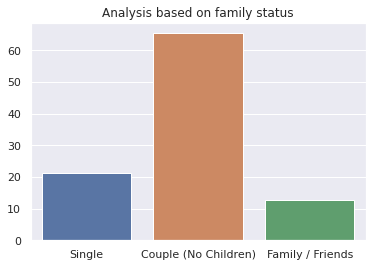

In [ ]:
## Select single, couple, multiple adults and family

single   = not_canceled[(not_canceled.adults==1) & (not_canceled.children==0) & (not_canceled.babies==0)]
couple   = not_canceled[(not_canceled.adults==2) & (not_canceled.children==0) & (not_canceled.babies==0)]
family   = not_canceled[not_canceled.adults + not_canceled.children + not_canceled.babies > 2]


## Make the list of Category names, and their total percentage
x = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
y = [x/not_canceled.shape[0]*100 for x in count]
## Draw the curve
sns.barplot(x , y)
plt.title('Analysis based on family status')
plt.show()


Observation :The most common type of accommodation is the couple (or two adults). As a result, hotels can plan accordingly.

---



# **Cancellation Analysis**

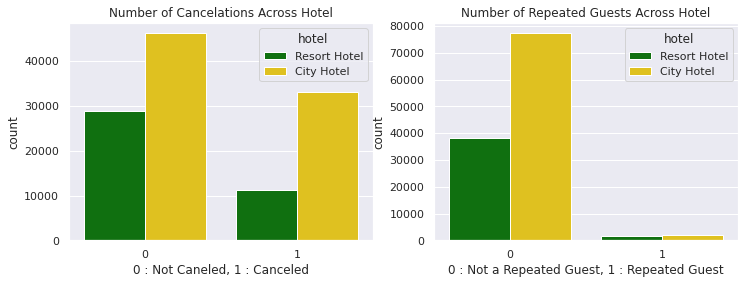

In [116]:
# Checking count of canceled bookings across hotels and count of repeated guests across both the hotels
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.countplot(data=data_c, x='is_canceled', hue='hotel', ax=ax[0],palette = colours)
ax[0].set_title('Number of Cancelations Across Hotel')
ax[0].set_xlabel('0 : Not Caneled, 1 : Canceled')
sns.countplot(data=data_c, x='is_repeated_guest', hue='hotel', ax=ax[1], palette = colours)
ax[1].set_title('Number of Repeated Guests Across Hotel')
ax[1].set_xlabel('0 : Not a Repeated Guest, 1 : Repeated Guest')

fig.show()

Observation : For both hotels, Confirmed Bookings outnumber Canceled Bookings.

---



### ***Cancellation by Month***

---



In [ ]:
cancel_by_month = data_c.groupby(['arrival_date_month','hotel'])['is_canceled'].sum().reset_index()
cancel_by_month

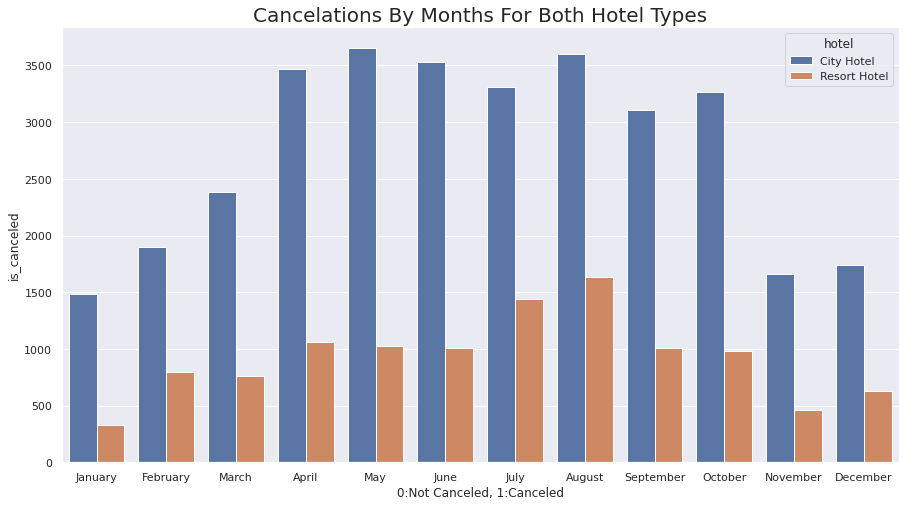

In [ ]:
cancel_by_month["arrival_date_month"] = pd.Categorical(cancel_by_month["arrival_date_month"], categories=ordered_months, ordered=True)
#Cancelation across months for City Hotel
plt.figure(figsize=(15,8))
sns.barplot(data=cancel_by_month, x='arrival_date_month', y ='is_canceled', hue='hotel')
plt.xlabel('0:Not Canceled, 1:Canceled')
plt.title("Cancelations By Months For Both Hotel Types", fontdict={'fontsize':20})
plt.show()



Observation : For both hotels, Confirmed Bookings outnumber Canceled Bookings.

---



### ***Cancellation by Guests***

---



In [118]:
cancel_by_cust = data_c.groupby(['hotel','customer_type'])['is_canceled'].sum().reset_index().sort_values('is_canceled')
cancel_by_cust

,hotel,customer_type,is_canceled
1,City Hotel,Group,29
5,Resort Hotel,Group,30
4,Resort Hotel,Contract,157
0,City Hotel,Contract,1105
7,Resort Hotel,Transient-Party,1519
3,City Hotel,Transient-Party,4870
6,Resort Hotel,Transient,9416
2,City Hotel,Transient,27098


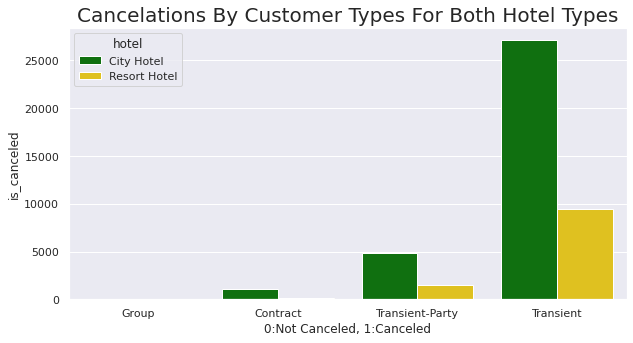

In [121]:
#Cancelation across months for City Hotel
plt.figure(figsize=(10,5))
sns.barplot(data=cancel_by_cust, x='customer_type', y ='is_canceled', hue='hotel',palette = colors)
plt.xlabel('0:Not Canceled, 1:Canceled')
plt.title("Cancelations By Customer Types For Both Hotel Types", fontdict={'fontsize':20})
plt.show()

Observation : The pattern seen for confirmed reservations that haven't been canceled at City Hotel is the same.
There have been no cancellations in the Resort Hotel's Contract or Group categories.
---



### **ADR by Guests**

---



In [ ]:
total_guests_month=not_canceled.groupby(['arrival_date_month'])['total_guests']
total_guests1=not_canceled.groupby(['total_guests'])['arrival_date_month'].max().reset_index()
total_guests1
guest_by_month = not_canceled.groupby(['arrival_date_month'])['total_guests'].sum().reset_index()
guest_by_month

,arrival_date_month,total_guests
0,April,12833
1,August,19138
2,December,8492
3,February,10029
4,January,7186
5,July,17317
6,June,12520
7,March,12245
8,May,13442
9,November,8017


### ***ADR per Month***

---



In [ ]:
data_resort = not_canceled[(df['hotel'] == 'Resort Hotel')]
data_city = not_canceled[(df['hotel'] == 'City Hotel')]

In [ ]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

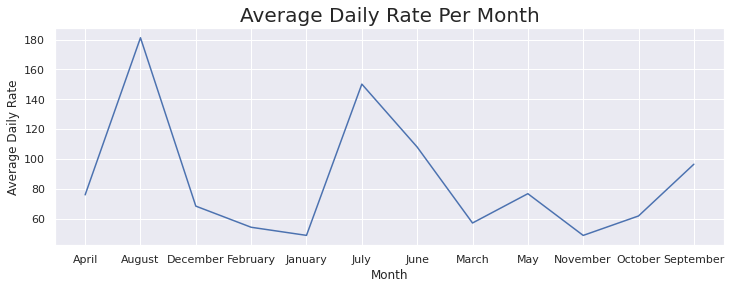

In [ ]:
# Plot ADR versus Months
plt.figure(figsize=(12,4))
sns.lineplot(data=resort_hotel , x='arrival_date_month', y='adr', palette='hot')
plt.title('Average Daily Rate Per Month', fontdict={'fontsize' : 20})
plt.xlabel('Month')
plt.ylabel('Average Daily Rate')
plt.show()

In [ ]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


**This plot clearly shows that prices in the Resort Hotel are much higher during the August for both Hotel types**

**Booking by country**

## ***Country wise guest***

---



**1.Where do the guests come from?**

---



In [ ]:
ctywise_guests = not_canceled.country.value_counts().reset_index()
ctywise_guests .columns = ['Country', 'No_of_guests']
ctywise_guests 

,Country,No_of_guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [ ]:
top_countries = ctywise_guests.head(10)
top_countries

,Country,No_of_guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
5,IRL,2543
6,ITA,2433
7,BEL,1868
8,NLD,1717
9,USA,1596


**Which are the busiest month?**

In [ ]:
not_canceled.groupby("country")["Total_Guests"].count().reset_index()

,country,Total_Guests
0,ABW,2
1,AGO,157
2,AIA,1
3,ALB,10
4,AND,2
...,...,...
161,VEN,14
162,VNM,6
163,ZAF,49
164,ZMB,1


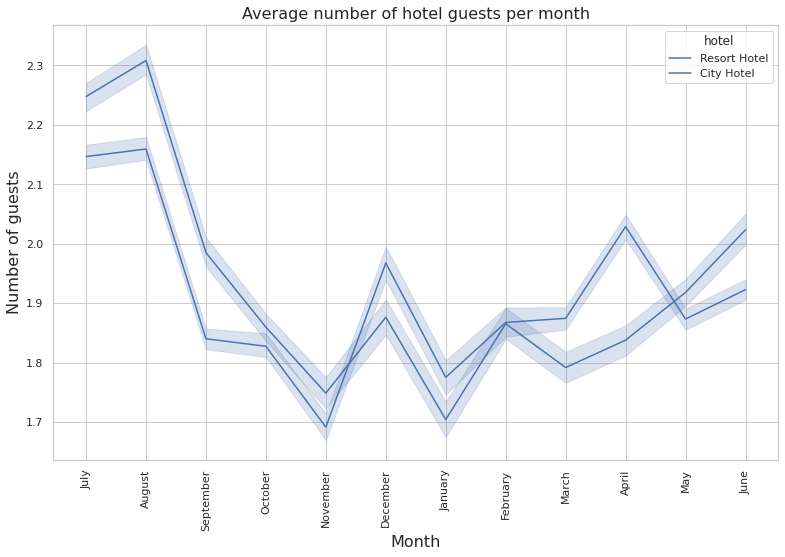

In [ ]:
#show figure:
#fig, ax = plt.subplots(1, 2, figsize=(15,10))
plt.figure(figsize=(13, 8))
sns.lineplot(x = "arrival_date_month", y="Total_Guests", hue="hotel", data=data_resort) 
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=90)
plt.ylabel("Number of guests", fontsize=16)
sns.lineplot(x = "arrival_date_month", y="Total_Guests", hue="hotel", data=data_city) 
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=90)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

### ***Booking Trend based on Months***

---



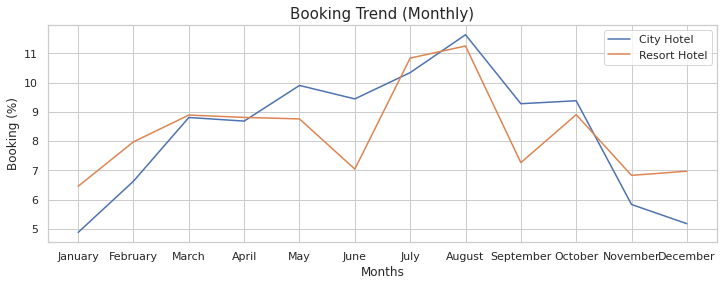

In [ ]:
## Extract City Hotel
sorted_months = not_canceled.loc[not_canceled.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(month_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100

## Extract Resort Hotel
sorted_months = not_canceled.loc[not_canceled.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(month_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100

## Draw the line plot

fig, ax = plt.subplots(figsize=(12,4))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)',fontdict = {'fontsize' : 15})

sns.lineplot(x1, y1.values, label='City Hotel', sort=False, palette= colors)
sns.lineplot(x1, y2.values, label='Resort Hotel', sort=False, palette=colors)

plt.show()

Observation : With a slight variation, we can see that the trend is somewhat similar. The number of reservations at the resort is higher at the beginning and the end of the year and is lower in June and September.

---



# ***CONCLUSION***  *`[based on Descriptive Analysis]`*

---
***Based on descriptive analysis, it is clear that a third of all bookings have been canceled by customers. Over 50% of cancellations are made by group segment, and offline and internet TA/TOs have cancellation rates above 33%. However, lower cancellation rates are made from live segments.  According to this analysis, it is easier to understand that the majority of individuals do not seem to like a stay in a hotel longer than a week. However, hotel stays of up to 12-13 days seem to be common. Staying longer than 15 days will inevitably generate outlier values ​​for each segment, although this varies by segment. This analysis also shows that the number of guests staying at hotels in the city is increasing every year at a rate of . reservation rate over 60% of the population. Portugal, UK, France, Spain, Germany, Ireland, Italy and Belgium are ranked in the top 15 countries based on guest bookings and length of stay at both hotels.   In 2016, the number of reservations doubled compared to 2015. However, the number of reservations in 2017 decreased by about 15%. As observed, July and August are the busiest months although prices are quite high compared to other months.***

---


